# Title: 💳 Credit Card Fraud Detection 🕵️‍♂️ Model

## 1. Problem Definition:
> We've to detect fraudulent credit card transactions for XYZ Bank to minimize financial losses and enhance the security of customer transactions.

## 2. Data Information:
The data is sourced from Kaggle and contains credit card transactions provided by a bank. This dataset includes various features that describe each transaction, along with a label indicating whether the transaction is fraudulent or legitimate.

Data Link: [https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?select=creditcard.csv]

## 3. Evaluation:
The specific evaluation metric wasn't defined on kaggle so we'll do evaluation on all the metrices
* Accuracy Score
* Precision
* Recall
* F1 Score



## Getting Data ready

#### Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Importing data

In [2]:
card_df = pd.read_csv("/content/drive/MyDrive/Wahaj's Working Bench/Fraud-Analysis-Project/Project-Data/creditcard.csv")

In [3]:
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
card_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
card_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
card_df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Hence the data doesn't have any null value and also it cannot contain string dtype column

we have to predict the class wheather the transacion is Illegal or legit

* 0 ---> Transaction is legit
* 1 ---> Transaction is Fraud

In [8]:
card_df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Oooppsssiii...! the data is very imbalance

<Axes: ylabel='count'>

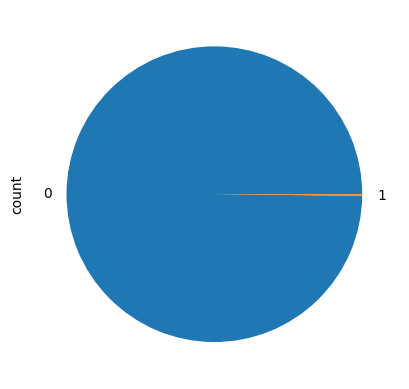

In [9]:
# You can see visually
card_df.Class.value_counts().plot.pie()

#### Balancing the dataset

To balance the dataset, we'll create a new dataset with an equal number of samples from each class. Here's how we'll do it:

1. **Separate the Data:** Divide the original dataset into two subsets: one containing fraud transactions and the other containing legitimate transactions.

2. **Sample the Data:** First, count the number of fraud transactions to determine the size of the minority class. Then, randomly select the same number of legitimate transactions from the legitimate transactions subset. This ensures that the number of samples for each class (fraud and legitimate) is equal in the balanced dataset..

3. **Combine the Data:** Concatenate the sampled fraud transactions with the sampled legitimate transactions to form a balanced dataset.



##### 1. Separate the data

In [10]:
legit = card_df[card_df["Class"]==0]
fraud = card_df[card_df["Class"]==1]

##### 2. Sample the data

In [11]:
legit_samples = card_df.sample(n=492)

3. Combine the data

In [12]:
balance_df = pd.concat([legit_samples, fraud], axis=0) # axis = 0 to concate by row

In [13]:
balance_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
188171,127851.0,0.018316,0.800581,0.176533,-0.786413,0.656711,-0.530432,0.881645,-0.011601,-0.278365,...,-0.225739,-0.497902,0.020306,-0.403021,-0.492128,0.146463,0.246424,0.083174,1.79,0
177029,123011.0,0.832331,-0.062698,-0.054899,0.817293,-1.217600,1.368607,-0.047959,0.101861,0.781633,...,0.112539,0.643601,0.324125,0.240509,-1.374125,0.145510,-0.057633,-0.145709,200.00,0
115893,74061.0,-0.625045,0.885902,1.589177,-0.175961,0.624118,0.970954,0.427272,0.476803,-0.527944,...,-0.078599,0.010674,0.144289,-0.639249,-0.531022,0.177464,0.340278,0.110993,5.37,0
89527,62613.0,1.149150,0.067028,0.649724,1.343548,-0.593567,-0.563793,-0.039705,-0.057519,0.569055,...,-0.247794,-0.615512,0.014229,0.364201,0.492549,-0.527021,0.030156,0.030151,31.18,0
33374,37209.0,-0.657880,0.323362,1.236548,0.965240,0.811819,-0.078216,0.141193,0.281284,-0.686428,...,0.229339,0.476320,-0.095620,-0.334791,-0.220416,-0.219429,0.141347,0.137975,13.28,0


Visualization of data distribution

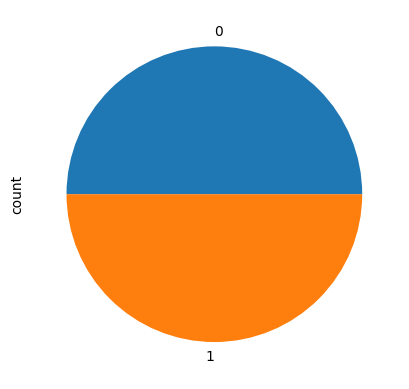

In [14]:
balance_df["Class"].value_counts().plot.pie();

In [15]:
len(balance_df)

984

Since after doing the class balance there are two cases
1. Data increase if we balance class with majority class
2. Data decrease if we balance class with minority class

checking the samples are good or bad

In [16]:
balance_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94989.603659,-0.040180,-0.009904,0.119109,-0.038350,0.054126,-0.052605,0.032523,-0.016108,0.003912,...,0.006086,0.041741,-0.015107,0.025727,0.037479,-0.013767,-0.014179,0.006434,0.003192,85.664512
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


hence there is difference between 1 and 0 rows

## Feature Engineering

The time data set is very important so making the time column more enrich with data

Timedelta function

Timedeltas are absolute differences in times, expressed in different units (e.g., days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format/value into a Timedelta type

In [17]:
# As the time is given in relative fashion we are using pandas. Timedelta which represents a duration the difference between two time trial
delta_time = pd.to_timedelta(balance_df['Time'],unit='s')

# Creat derived columns to enrich
balance_df['Time_Day'] = (delta_time.dt.components.days).astype(int)
balance_df['Time_Hour'] = (delta_time.dt.components.hours).astype(int)
balance_df['Time_Min'] = (delta_time.dt.components.minutes).astype(int)

In [18]:
# Drop the time column no more need
balance_df.drop('Time',axis=1, inplace = True)
# we'll keep only hour column
balance_df.drop(['Time_Day','Time_Min'],axis=1, inplace =True)

In [19]:
balance_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hour
188171,0.018316,0.800581,0.176533,-0.786413,0.656711,-0.530432,0.881645,-0.011601,-0.278365,-0.248071,...,-0.497902,0.020306,-0.403021,-0.492128,0.146463,0.246424,0.083174,1.79,0,11
177029,0.832331,-0.062698,-0.054899,0.817293,-1.217600,1.368607,-0.047959,0.101861,0.781633,0.420045,...,0.643601,0.324125,0.240509,-1.374125,0.145510,-0.057633,-0.145709,200.00,0,10
115893,-0.625045,0.885902,1.589177,-0.175961,0.624118,0.970954,0.427272,0.476803,-0.527944,-0.523930,...,0.010674,0.144289,-0.639249,-0.531022,0.177464,0.340278,0.110993,5.37,0,20
89527,1.149150,0.067028,0.649724,1.343548,-0.593567,-0.563793,-0.039705,-0.057519,0.569055,-0.160335,...,-0.615512,0.014229,0.364201,0.492549,-0.527021,0.030156,0.030151,31.18,0,17
33374,-0.657880,0.323362,1.236548,0.965240,0.811819,-0.078216,0.141193,0.281284,-0.686428,0.049764,...,0.476320,-0.095620,-0.334791,-0.220416,-0.219429,0.141347,0.137975,13.28,0,10


## Spliting data into Training and test sets

In [20]:
X = balance_df.drop('Class',axis=1)
y = balance_df['Class']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)

## Modeling

There are many models we'll try different models and select that model which score well or you can also use the roadmap

Link:[https://scikit-learn.org/1.3/tutorial/machine_learning_map/index.html]

Importing the model

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [23]:
np.random.seed(42)
# Making a single dict. which contain all of these models
models = {"LogisticRegression":LogisticRegression(max_iter=2000),
         "RandomForestClassifier":RandomForestClassifier(),
         "KNeighbours":KNeighborsClassifier()}
def model_Fit_score(models,X_train,X_test,y_train,y_test):
    """
    Models == The dict of Model you want to try out
    X_trian == your Training data set (Without Labels)
    X_test == your Test data set (Without Labels)
    y_train == your Training data set (With labels)
    y_test == yout Test data set (With Labels)
    """
    # Set the random seed
    np.random.seed(42)
    # Making an empty dict to store the score of models
    model_scores = {}
    for model_name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[model_name] = model.score(X_test,y_test)
    return model_scores

Fitting the model

In [24]:
model_Fit_score(models,X_train,X_test,y_train,y_test)

{'LogisticRegression': 0.9552845528455285,
 'RandomForestClassifier': 0.9390243902439024,
 'KNeighbours': 0.8821138211382114}

Since the LogisticRegression model is doing excellent work we'll choose this model, you can do this trick at low level but it will very messy at higher level

In [25]:
final_model = LogisticRegression(max_iter=2000)
final_model.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [26]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [27]:
def score(y_test,y_preds):
  score={"Accuracy score on test data:":accuracy_score(y_test,y_preds),
         "Recall Score on test data :":recall_score(y_test,y_preds),
         "Precision Score on test data :":precision_score(y_test,y_preds),
         "f1 Score on test data :":f1_score(y_test,y_preds)}
  return score

In [28]:
y_preds = final_model.predict(X_test)

In [29]:
score(y_test,y_preds)

{'Accuracy score on test data:': 0.9552845528455285,
 'Recall Score on test data :': 0.943089430894309,
 'Precision Score on test data :': 0.9666666666666667,
 'f1 Score on test data :': 0.9547325102880659}